# Predict Airbnb Profit (Part 1: Cleaning)

## Objective
The overall purpose of this project is to predict potential revenue and the features with the highest chance to generate profit

The data is from from Airbnb with various attributes for listings in Los Angeles CA. There is a significant amoun of data cleaning to prepare it for modeling and I will break these sections into different parts. The next part will be selecting the best model.

# Investigation and Cleaning

In [1]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the dataset
listing = pd.read_csv('data/listings.csv.gz')

# Look at the dimensions
listing.shape

C:\Users\peril\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(31253, 95)

In [2]:
listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,16228948,https://www.airbnb.com/rooms/16228948,20170502172350,2017-05-03,Robert Ranch in Los Angeles for filming/wedding,Stunning Ranch Estate situated on 20 acres and...,NaN,Stunning Ranch Estate situated on 20 acres and...,none,NaN,NaN,NaN,NaN,NaN,- No noise/music outside allowed after 10 pm. ...,NaN,NaN,https://a0.muscache.com/im/pictures/dd850460-4...,NaN,54345288,https://www.airbnb.com/users/show/54345288,Robert,2016-01-12,"Los Angeles, California, United States",Thank You for considering my house for your ne...,a few days or more,25%,NaN,f,https://a0.muscache.com/im/pictures/1977b9db-1...,https://a0.muscache.com/im/pictures/1977b9db-1...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Acton, CA 93510, United States",NaN,Acton,NaN,Acton,CA,93510,Other (Domestic),"Acton, CA",US,United States,34.530350,-118.227088,t,House,Entire home/apt,10,7.0,5.0,5.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Pool,K...",NaN,"$3,000.00",NaN,NaN,"$2,000.00",$200.00,1,$0.00,1,1125,5 months ago,NaN,27,53,82,352,2017-05-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,strict,f,f,1,NaN
1,8909380,https://www.airbnb.com/rooms/8909380,20170502172350,2017-05-03,Nice quiet private ranch house,NaN,Very private and quite . Hiking horse riding a...,Very private and quite . Hiking horse riding a...,none,I'm in the country what's not to love about that,NaN,The train station is only one mile away,Whole house,As much or as little as they want,NaN,https://a0.muscache.com/im/pictures/38165109-1...,https://a0.muscache.com/im/pictures/38165109-1...,https://a0.muscache.com/im/pictures/38165109-1...,https://a0.muscache.com/im/pictures/38165109-1...,44800067,https://www.airbnb.com/users/show/44800067,Kevin,2015-09-22,"Acton, California, United States",NaN,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/287ea76c-1...,https://a0.muscache.com/im/pictures/287ea76c-1...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Palmdale, CA 93550, United States",NaN,Acton,NaN,Palmdale,CA,93550,Other (Domestic),"Palmdale, CA",US,United States,34.485431,-118.125380,f,House,Private room,2,1.0,1.0,1.0,Real Bed,{},NaN,$50.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,2 months ago,NaN,29,45,75,350,2017-05-03,33,2015-12-04,2017-04-22,93.0,10.0,10.0,10.0,10.0,9.0,9.0,f,NaN,NaN,f,flexible,f,f,1,1.91
2,14078522,https://www.airbnb.com/rooms/14078522,20170502172350,2017-05-03,Room w/private bath on Small Ranch,My place is close to Six Flags Magic Mountain ...,Room with queen bed and private bath,My place is close to Six Flags Magic Mountain ...,none,Horse area. Trails for hiking

### Remove Certain Features

In [3]:
# It has almost 100 columns, I'll drop the obvious features like url's
listing= listing.drop(['listing_url','scrape_id','last_scraped','thumbnail_url',
                       'medium_url','picture_url','xl_picture_url','host_url',
                       'host_name','host_location','host_about',
                       'host_thumbnail_url','host_picture_url',
                       'host_neighbourhood','host_verifications','weekly_price',
                       'monthly_price','calendar_last_scraped','first_review',
                       'last_review','host_acceptance_rate','neighbourhood_group_cleansed',
                      'square_feet','has_availability','license','availability_90',
                       'availability_60','availability_30'], axis=1)

# For the sake of this project I will remove unbstructured text features and investigate them in another project to 
# show the value of text classification to modeling
listing= listing.drop(['name','summary',
                       'space','notes','transit','access','interaction',
                       'description','house_rules','street'], axis=1)

### Missing/Null Values

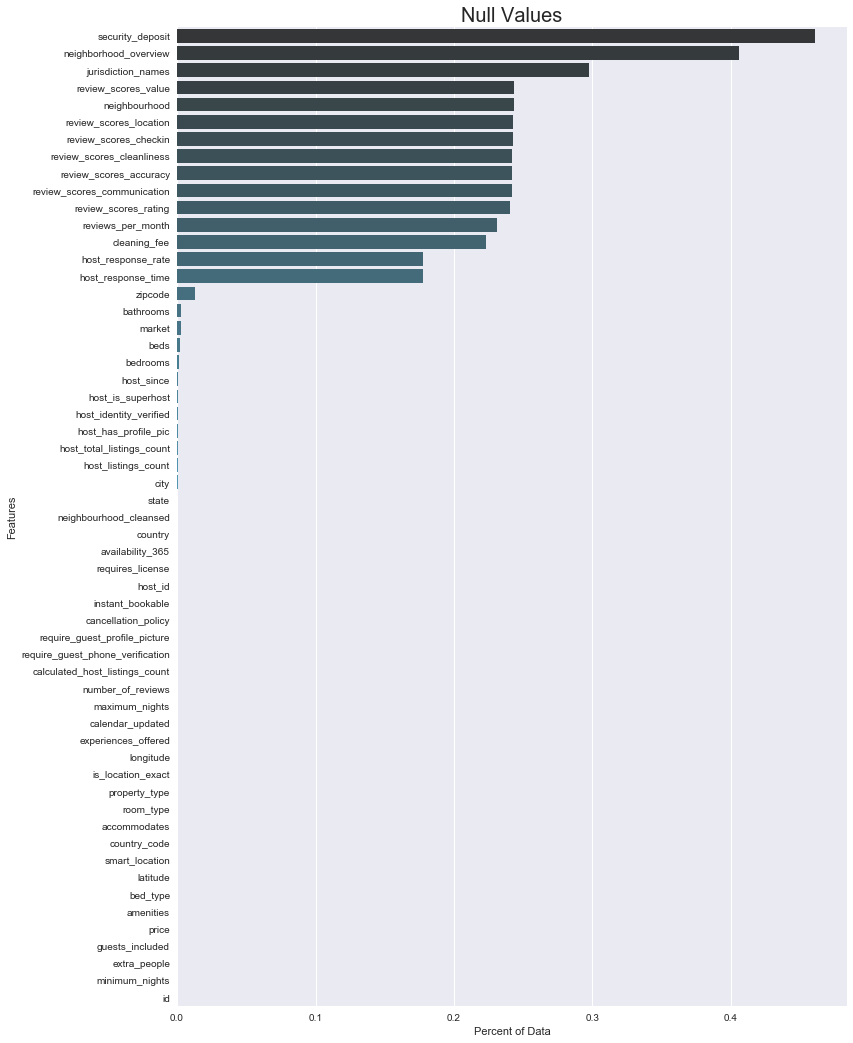

In [4]:
# Count null values
null = listing.isnull().sum(axis=0)
null = pd.DataFrame(null).reset_index()
null['percent'] = null[0]/31253 

# Plot null values, sorted
null = null.sort_values(by='percent',ascending=False)
fig, ax = plt.subplots(figsize=(12,18))
ax.set_yticklabels(null.index.values, rotation='horizontal')
sns.barplot(x=null['percent'],y=null['index'], palette='GnBu_d').set_title('Null Values',fontsize=20)
ax.set(xlabel='Percent of Data', ylabel='Features')

In [5]:
# Droping features with NaN's over 25% of instances
listing= listing.drop(['security_deposit',
                       'neighborhood_overview','jurisdiction_names','review_scores_value','review_scores_accuracy',
                       'review_scores_cleanliness','review_scores_checkin',
                       'review_scores_communication','neighbourhood','review_scores_location','experiences_offered'], axis=1)

### Spatial Analysis

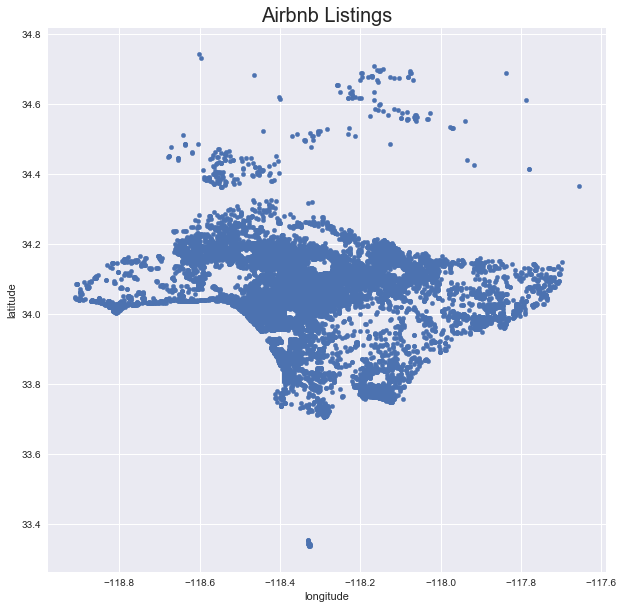

In [6]:
# Plot based on lat and long
listing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,10))
plt.title('Airbnb Listings', fontsize=20)

In [7]:
# There are a lot of outliers north of Los Angeles that I won't consider as part of the area
listing = listing.query('latitude<34.35')

# There are a few outliers down towards San Diego
listing = listing.query('latitude>33.6')

### Categorical Feature Analysis

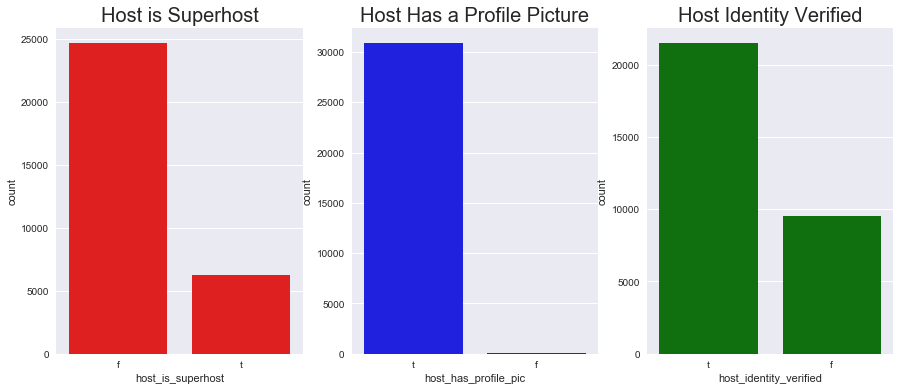

In [8]:
# Categorical plots
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.countplot(listing['host_is_superhost'], color="red", ax=axes[0]).set_title('Host is Superhost', fontsize=20)
sns.countplot(listing['host_has_profile_pic'], color="blue", ax=axes[1]).set_title('Host Has a Profile Picture', fontsize=20)
sns.countplot(listing['host_identity_verified'], color="green", ax=axes[2]).set_title('Host Identity Verified', fontsize=20)

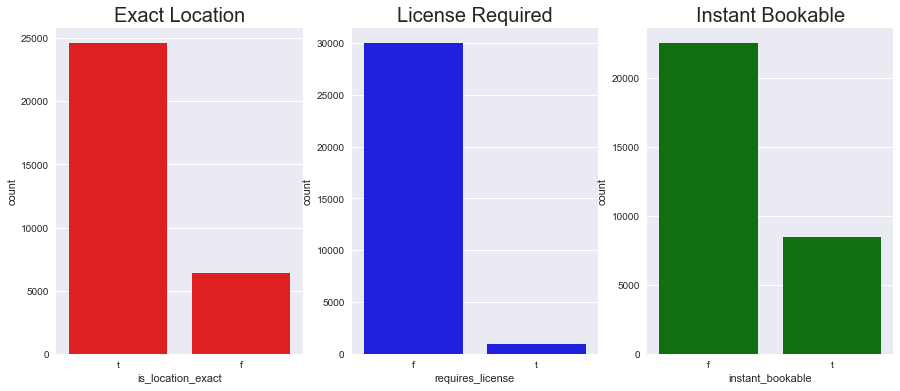

In [9]:
# Categorical plots
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.countplot(listing['is_location_exact'], color="red", ax=axes[0]).set_title('Exact Location', fontsize=20)
sns.countplot(listing['requires_license'], color="blue", ax=axes[1]).set_title('License Required', fontsize=20)
sns.countplot(listing['instant_bookable'], color="green", ax=axes[2]).set_title('Instant Bookable', fontsize=20)

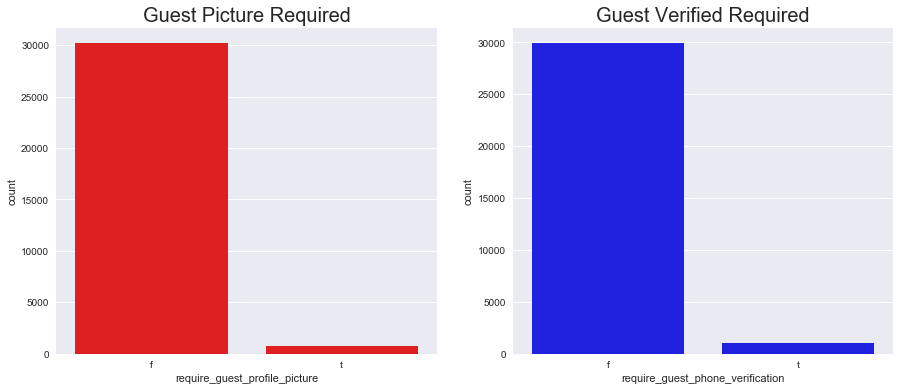

In [10]:
# Categorical plots
f, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.countplot(listing['require_guest_profile_picture'], color="red", ax=axes[0]).set_title('Guest Picture Required', fontsize=20)
sns.countplot(listing['require_guest_phone_verification'], color="blue", ax=axes[1]).set_title('Guest Verified Required', fontsize=20)

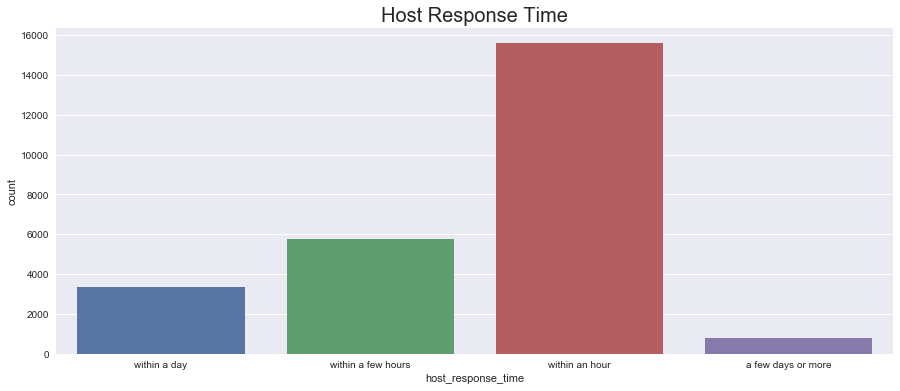

In [11]:
# Categorical plots
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(listing['host_response_time']).set_title('Host Response Time', fontsize=20)

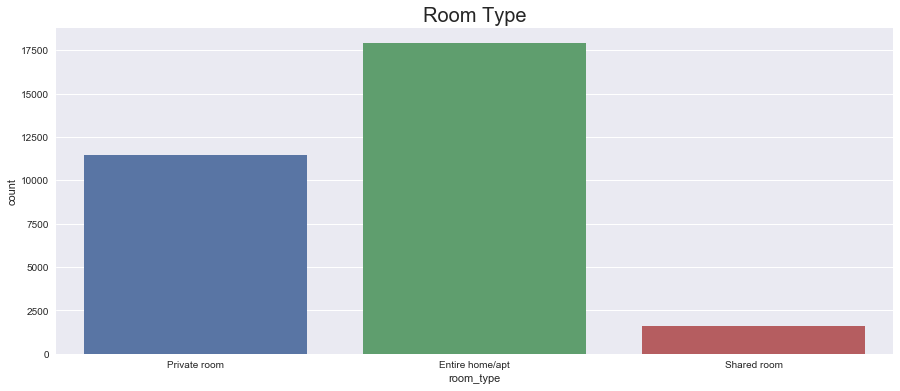

In [12]:
# Categorical plots
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(listing['room_type']).set_title('Room Type', fontsize=20)

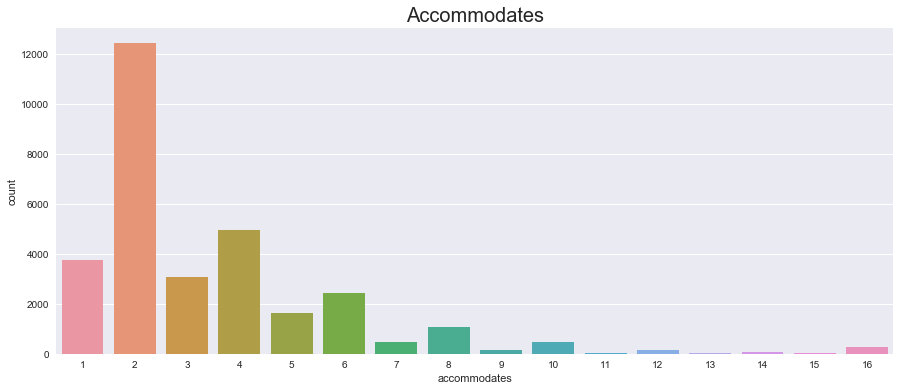

In [13]:
# Categorical plots
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(listing['accommodates']).set_title('Accommodates', fontsize=20)

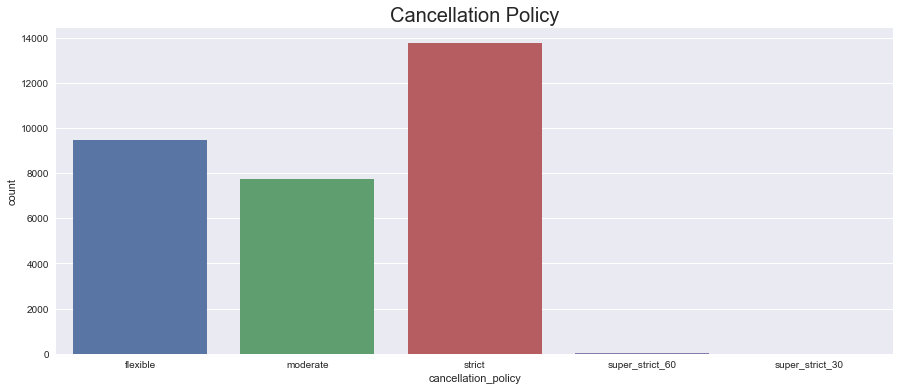

In [14]:
# Categorical plots
f, axes = plt.subplots(figsize=(15, 6))
sns.countplot(listing['cancellation_policy']).set_title('Cancellation Policy', fontsize=20)

### Distributions

In [15]:
convert = ('price','cleaning_fee','extra_people')

for con in (convert):
    listing[con] = (listing[con].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
    
listing['host_response_rate'] = (listing['host_response_rate'].replace( '[\%,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

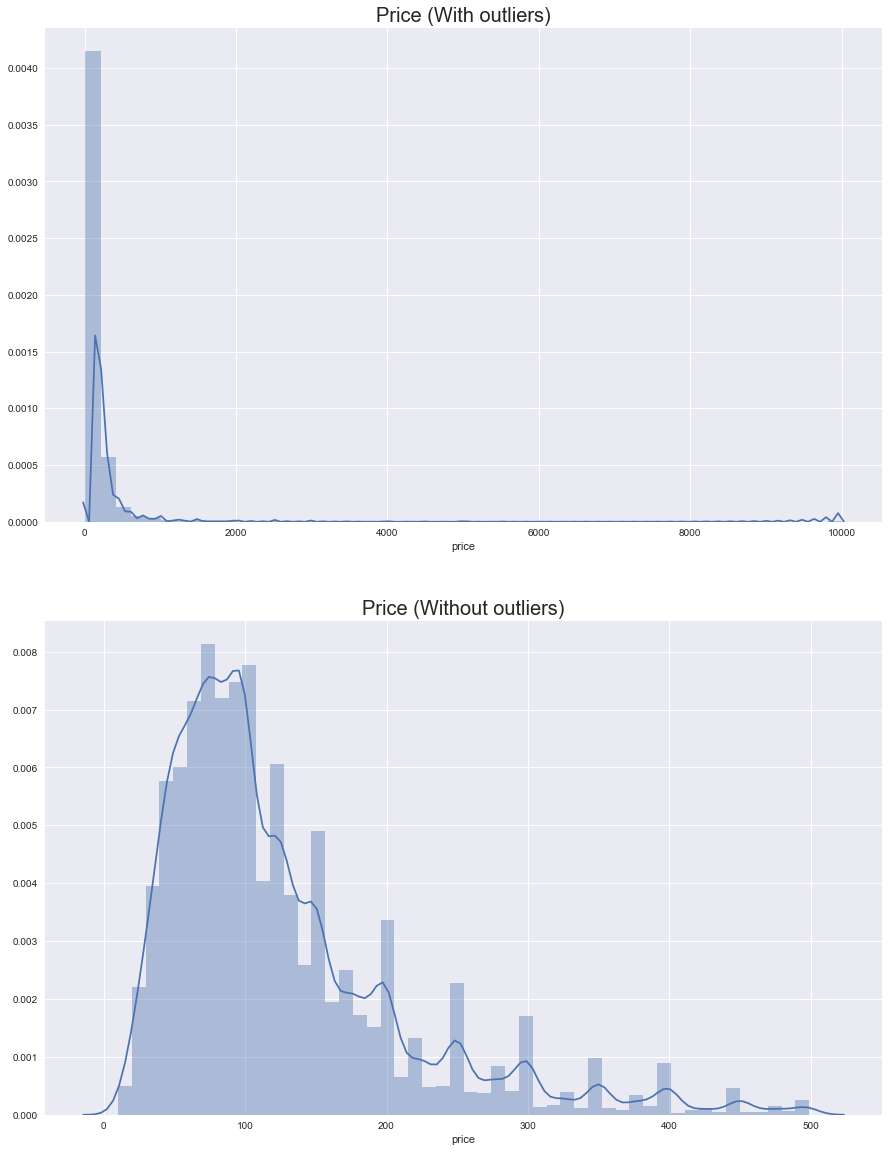

In [16]:
# Without outliers
pricing = listing.query('price<500')

# Review distribution
f, axes = plt.subplots(nrows=2, figsize=(15, 20))
sns.distplot(listing['price'],ax=axes[0]).set_title('Price (With outliers)', fontsize=20)
sns.distplot(pricing['price'], ax=axes[1]).set_title('Price (Without outliers)', fontsize=20)

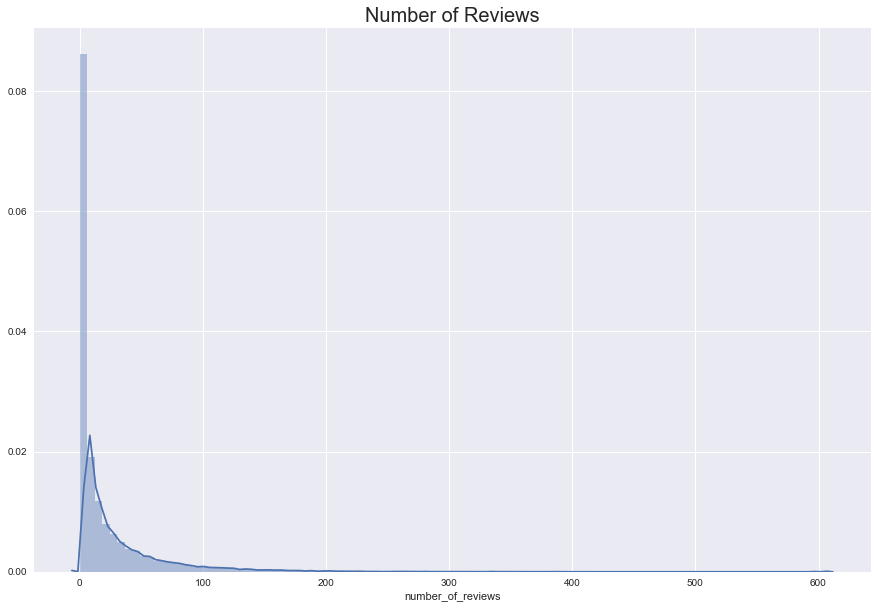

In [17]:
# Review distribution
f, axes = plt.subplots(figsize=(15, 10))
sns.distplot(listing['number_of_reviews'], bins=100).set_title('Number of Reviews', fontsize=20)

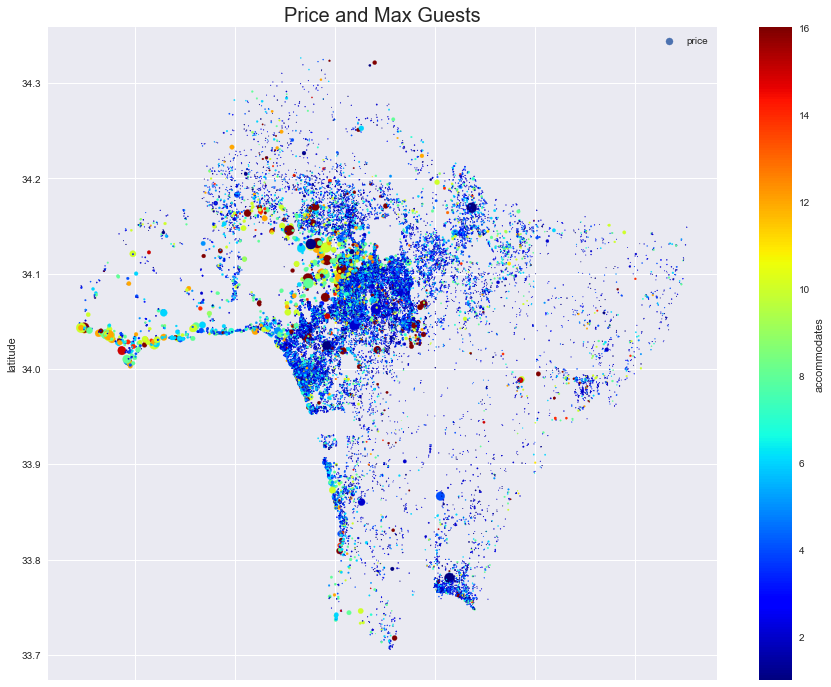

In [18]:
# with a slice on median income
listing.plot(kind="scatter", x="longitude", y="latitude", s=listing["price"]/100, 
             label="price", figsize=(15,12), c="accommodates", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.title('Price and Max Guests', fontsize=20)

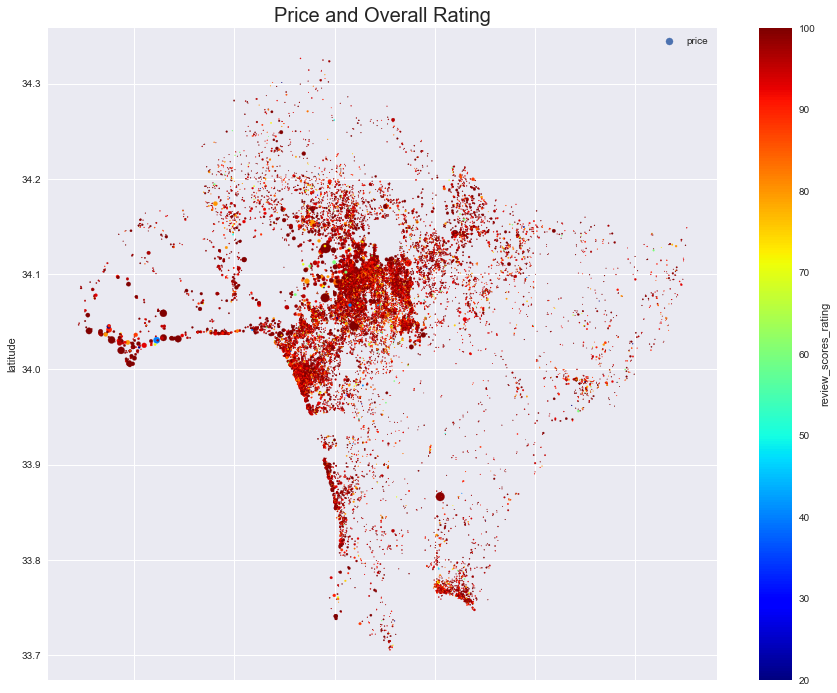

In [19]:
# with a slice on median income
listing.plot(kind="scatter", x="longitude", y="latitude", s=listing["price"]/100, 
             label="price", figsize=(15,12), c="review_scores_rating", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.title('Price and Overall Rating', fontsize=20)

## Final Cleaning

In [20]:
# Droping features with little to no variation
listing= listing.drop(['host_has_profile_pic','requires_license',
                       'require_guest_profile_picture','neighbourhood_cleansed',
                       'require_guest_phone_verification','id','host_id',
                       'city','market','smart_location','country_code','country'], axis=1)

# Drop lat and long since we don't need it anymore
listing= listing.drop(['latitude','longitude'],axis=1)

# Derive new features from the text field 'amenities'
ame = listing.amenities.astype('object')
ame_list = ('Internet','Wireless','Kitchen','Free parking','Air conditioning','TV','Pets','Heating')

for am in (ame_list):
    listing[am] = ame.str.contains(am)
    
# Convert strings to integers for boolean values
bool = ('host_is_superhost','host_identity_verified','is_location_exact','instant_bookable')

for b in (bool):
    listing[b] = listing[b].map({'t': 1, 'f': 0})
    
# Impute missing instances with the median
missing = ('host_response_rate','bathrooms','review_scores_rating','reviews_per_month','cleaning_fee',
           'beds','bedrooms','host_listings_count','host_is_superhost','host_total_listings_count')

for m in (missing):
    listing[m].fillna(listing[m].mean(),inplace=True)
    
# Turn categorical into column features
features = ['host_response_time','zipcode','property_type','room_type','bed_type','cancellation_policy']
listing = pd.get_dummies(listing,columns=features,drop_first=True)

# Final column drop
final = listing.drop(['state','amenities',
                       'calendar_updated'], axis=1)

### Check Data

In [21]:
final.shape

(30998, 365)

In [22]:
final.head()

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month,Internet,Wireless,Kitchen,Free parking,Air conditioning,TV,Pets,Heating,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,zipcode_210,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_90004,zipcode_90005,zipcode_90005-3747,zipcode_90006,zipcode_90007,zipcode_90008,zipcode_90010,zipcode_90011,zipcode_90012,zipcode_90013,zipcode_90014,zipcode_90015,zipcode_90016,zipcode_90017,zipcode_90018,zipcode_90019,zipcode_90020,zipcode_90021,zipcode_90022,zipcode_90023,zipcode_90024,zipcode_90025,zipcode_90026,zipcode_90027,zipcode_90028,zipcode_90029,zipcode_90031,zipcode_90032,zipcode_90033,zipcode_90034,zipcode_90034-2203,zipcode_90035,zipcode_90035-4475,zipcode_90036,zipcode_90036-2514,zipcode_90037,zipcode_90038,zipcode_90039,zipcode_90039-2715,zipcode_9004,zipcode_90040,zipcode_90041,zipcode_90042,zipcode_90043,zipcode_90044,zipcode_90045,zipcode_90046,zipcode_90047,zipcode_90048,zipcode_90049,zipcode_90056,zipcode_90057,zipcode_90058,zipcode_90059,zipcode_90061,zipcode_90062,zipcode_90063,zipcode_90064,zipcode_90065,zipcode_90066,zipcode_90067,zipcode_90068,zipcode_90069,zipcode_90071,zipcode_90077,zipcode_90094,zipcode_90095,zipcode_90201,zipcode_90210,zipcode_90211,zipcode_90212,zipcode_90220,zipcode_90221,zipcode_90222,zipcode_90230,zipcode_90232,zipcode_90240,zipcode_90241,zipcode_90242,zipcode_90245,zipcode_90247,zipcode_90248,zipcode_90249,zipcode_90250,zipcode_90254,zipcode_90255,zipcode_90260,zipcode_90262,zipcode_90265,zipcode_90266,zipcode_90272,zipcode_90274,zipcode_90275,zipcode_90277,zipcode_90278,zipcode_90280,zipcode_90290,zipcode_90291,zipcode_90292,zipcode_90293,zipcode_90301,zipcode_90302,zipcode_90303,zipcode_90304,zipcode_90305,zipcode_90401,zipcode_90402,zipcode_90403,zipcode_90403-2638,zipcode_90404,zipcode_90405,zipcode_90501,zipcode_90502,zipcode_90503,zipcode_90504,zipcode_90505,zipcode_90601,zipcode_90602,zipcode_90603,zipcode_90604,zipcode_90605,zipcode_90606,zipcode_90621,zipcode_90625,zipcode_90630,zipcode_90631,zipcode_90638,zipcode_90640,zipcode_90650,zipcode_90660,zipcode_90670,zipcode_90701,zipcode_90703,zipcode_90706,zipcode_90710,zipcode_90712,zipcode_90713,zipcode_90715,zipcode_90716,zipcode_90717,zipcode_90723,zipcode_90731,zipcode_90732,zipcode_90744,zipcode_90745,zipcode_90746,zipcode_90755,zipcode_90802,zipcode_90803,zipcode_90804,zipcode_90805,zipcode_90806,zipcode_90807,zipcode_90808,zipcode_90810,zipcode_90813,zipcode_90814,zipcode_90815,zipcode_90840,zipcode_90929,zipcode_91001,zipcode_91001-2243,zipcode_91006,zipcode_91007,zipcode_91008,zipcode_91010,zipcode_91011,zipcode_91016,zipcode_91020,zipcode_91024,zipcode_91030,zipcode_91040,zipcode_91042,zipcode_91101,zipcode_91103,zipcode_91104,zipcode_91105,zipcode_91106,zipcode_91107,zipcode_91108,zipcode_91201,zipcode_91202,zipcode_91203,zipcode_91204,zipcode_91205,zipcode_91206,zipcode_91207,zipcode_91208,zipcode_91210,zipcode_91214,zipcode_91301,zipcode_91302,zipcode_91303,zipcode_91304,zipcode_91306,zipcode_91307,zipcode_91308,zipcode_91311,zipcode_91316,zipcode_91324,zipcode_91325,zipcode_91326,zipcode_91331,zipcode_91335,zipcode_91340,zipcode_91342,zipcode_91343,zipcode_91344,zipcode_91345,zipcode_91352,zipcode_91356,zipcode_91361,zipcode_91362,zipcode_91364,zipcode_91367,zipcode_91377,zipcode_91381,zipcode_91401,zipcode_91402,zipcode_91403,zipcode_91405,zipcode_91406,zipcode_91411,zipcode_91423,zipcode_91436,zipcode_91501,zipcode_91502,zipcode_91504,zipcode_91505,zipcode_91506,zipcode_91523,zipcode_91601,zipcode_91602,zipcode_91604,zipcode_91604-3646,zipcode_91605,zipcode_91606,zipcode_91606-1412,zipcode_91607,zipcode

In [23]:
final.describe()

,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,zipcode_210,zipcode_90001,zipcode_90002,zipcode_90003,zipcode_90004,zipcode_90005,zipcode_90005-3747,zipcode_90006,zipcode_90007,zipcode_90008,zipcode_90010,zipcode_90011,zipcode_90012,zipcode_90013,zipcode_90014,zipcode_90015,zipcode_90016,zipcode_90017,zipcode_90018,zipcode_90019,zipcode_90020,zipcode_90021,zipcode_90022,zipcode_90023,zipcode_90024,zipcode_90025,zipcode_90026,zipcode_90027,zipcode_90028,zipcode_90029,zipcode_90031,zipcode_90032,zipcode_90033,zipcode_90034,zipcode_90034-2203,zipcode_90035,zipcode_90035-4475,zipcode_90036,zipcode_90036-2514,zipcode_90037,zipcode_90038,zipcode_90039,zipcode_90039-2715,zipcode_9004,zipcode_90040,zipcode_90041,zipcode_90042,zipcode_90043,zipcode_90044,zipcode_90045,zipcode_90046,zipcode_90047,zipcode_90048,zipcode_90049,zipcode_90056,zipcode_90057,zipcode_90058,zipcode_90059,zipcode_90061,zipcode_90062,zipcode_90063,zipcode_90064,zipcode_90065,zipcode_90066,zipcode_90067,zipcode_90068,zipcode_90069,zipcode_90071,zipcode_90077,zipcode_90094,zipcode_90095,zipcode_90201,zipcode_90210,zipcode_90211,zipcode_90212,zipcode_90220,zipcode_90221,zipcode_90222,zipcode_90230,zipcode_90232,zipcode_90240,zipcode_90241,zipcode_90242,zipcode_90245,zipcode_90247,zipcode_90248,zipcode_90249,zipcode_90250,zipcode_90254,zipcode_90255,zipcode_90260,zipcode_90262,zipcode_90265,zipcode_90266,zipcode_90272,zipcode_90274,zipcode_90275,zipcode_90277,zipcode_90278,zipcode_90280,zipcode_90290,zipcode_90291,zipcode_90292,zipcode_90293,zipcode_90301,zipcode_90302,zipcode_90303,zipcode_90304,zipcode_90305,zipcode_90401,zipcode_90402,zipcode_90403,zipcode_90403-2638,zipcode_90404,zipcode_90405,zipcode_90501,zipcode_90502,zipcode_90503,zipcode_90504,zipcode_90505,zipcode_90601,zipcode_90602,zipcode_90603,zipcode_90604,zipcode_90605,zipcode_90606,zipcode_90621,zipcode_90625,zipcode_90630,zipcode_90631,zipcode_90638,zipcode_90640,zipcode_90650,zipcode_90660,zipcode_90670,zipcode_90701,zipcode_90703,zipcode_90706,zipcode_90710,zipcode_90712,zipcode_90713,zipcode_90715,zipcode_90716,zipcode_90717,zipcode_90723,zipcode_90731,zipcode_90732,zipcode_90744,zipcode_90745,zipcode_90746,zipcode_90755,zipcode_90802,zipcode_90803,zipcode_90804,zipcode_90805,zipcode_90806,zipcode_90807,zipcode_90808,zipcode_90810,zipcode_90813,zipcode_90814,zipcode_90815,zipcode_90840,zipcode_90929,zipcode_91001,zipcode_91001-2243,zipcode_91006,zipcode_91007,zipcode_91008,zipcode_91010,zipcode_91011,zipcode_91016,zipcode_91020,zipcode_91024,zipcode_91030,zipcode_91040,zipcode_91042,zipcode_91101,zipcode_91103,zipcode_91104,zipcode_91105,zipcode_91106,zipcode_91107,zipcode_91108,zipcode_91201,zipcode_91202,zipcode_91203,zipcode_91204,zipcode_91205,zipcode_91206,zipcode_91207,zipcode_91208,zipcode_91210,zipcode_91214,zipcode_91301,zipcode_91302,zipcode_91303,zipcode_91304,zipcode_91306,zipcode_91307,zipcode_91308,zipcode_91311,zipcode_91316,zipcode_91324,zipcode_91325,zipcode_91326,zipcode_91331,zipcode_91335,zipcode_91340,zipcode_91342,zipcode_91343,zipcode_91344,zipcode_91345,zipcode_91352,zipcode_91356,zipcode_91361,zipcode_91362,zipcode_91364,zipcode_91367,zipcode_91377,zipcode_91381,zipcode_91401,zipcode_91402,zipcode_91403,zipcode_91405,zipcode_91406,zipcode_91411,zipcode_91423,zipcode_91436,zipcode_91501,zipcode_91502,zipcode_91504,zipcode_91505,zipcode_91506,zipcode_91523,zipcode_91601,zipcode_91602,zipcode_91604,zipcode_91604-3646,zipcode_91605,zipcode_91606,zipcode_91606-1412,zipcode_91607,zipcode_91702,zipcode_91706,zipcode_91708,zipcode_91711,zipcode_91722,zipcode_91723,zipcod

### Calculate our Target Variable - Revenue

In [24]:
# Airbnb says average stay is 3 days, and 50% of the time a review is made
avg_stay = 3
review_rate = 0.5
final['revenue'] = avg_stay * final['price'] * (final['reviews_per_month'] / review_rate) * 12

In [25]:
final.shape

(30998, 366)

In [26]:
# Now to save the cleaned data
final.to_csv('cleaned_airbnb.csv')